<a href="https://colab.research.google.com/github/Apaulgithub/oibsip_taskno3/blob/main/Car_Price_Prediction_with_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [125]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler,StandardScaler

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
import xgboost as xgb

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG,display
from graphviz import Source

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [126]:
df = pd.read_csv("data.csv")

In [127]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [128]:
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  301
Number of columns are:  9


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [130]:
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 2


In [131]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

### What did i know about the dataset?

* The car dataset consists of Cars Name, Price details, No. of Owner etc. of different cars.
* There are 301 rows and 9 columns provided in the data.
* 2 duplicate rows present in the dataset.
* Null values not exist in the dataset.

## ***2. Understanding The Variables***

In [135]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [136]:
df.describe(include= 'all').round(2)

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
count,301,301.00,301.00,301.00,301.00,301,301,301,301.00
unique,98,NaN,NaN,NaN,NaN,3,2,2,NaN
top,city,NaN,NaN,NaN,NaN,Petrol,Dealer,Manual,NaN
freq,26,NaN,NaN,NaN,NaN,239,195,261,NaN
mean,NaN,2013.63,4.66,7.63,36947.21,NaN,NaN,NaN,0.04
std,NaN,2.89,5.08,8.64,38886.88,NaN,NaN,NaN,0.25
min,NaN,2003.00,0.10,0.32,500.00,NaN,NaN,NaN,0.00
25%,NaN,2012.00,0.90,1.20,15000.00,NaN,NaN,NaN,0.00
50%,NaN,2014.00,3.60,6.40,32000.00,NaN,NaN,NaN,0.00
75%,NaN,2016.00,6.00,9.90,48767.00,NaN,NaN,NaN,0.00


In [137]:
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in Car_Name is 98
No. of unique values in Year is 16
No. of unique values in Selling_Price is 156
No. of unique values in Present_Price is 148
No. of unique values in Driven_kms is 206
No. of unique values in Fuel_Type is 3
No. of unique values in Selling_type is 2
No. of unique values in Transmission is 2
No. of unique values in Owner is 3


In [138]:
df['Current Year'] = 2023

df['no_year'] = df['Current Year'] - df['Year']

In [139]:
df.drop(['Current Year'], axis=1, inplace=True)

In [140]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner,no_year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [141]:
dependent_variable = ['Selling_Price']

### What all manipulations have i done and insights i found?

*   Adding a new column as 'no_year' by substracting the 'Year' from the 'Current Year' (which is taken as 2023).
*   Drop the 'Current Year' column from the DataFrame.







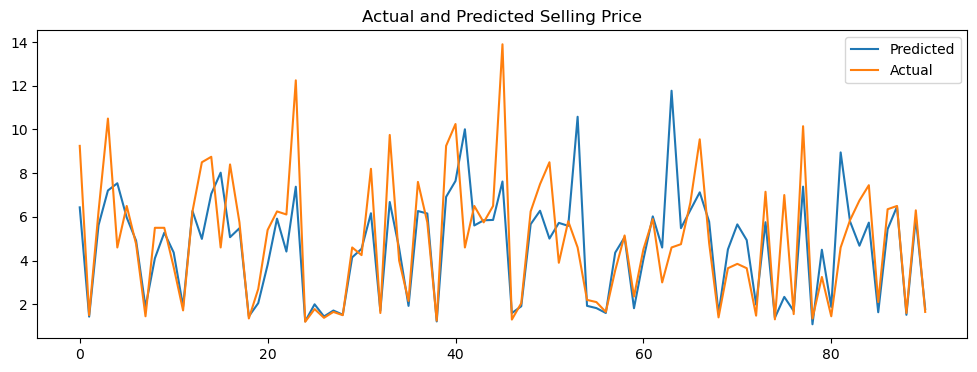

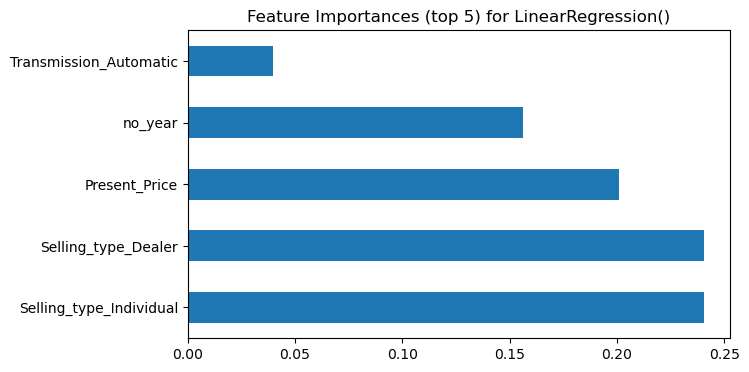

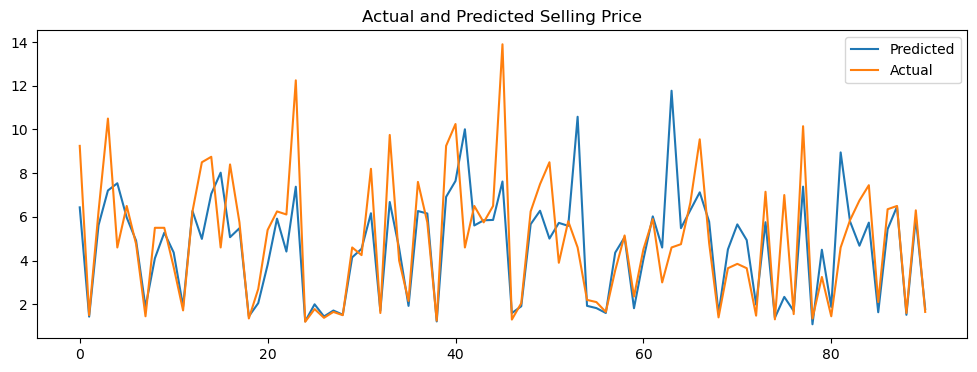

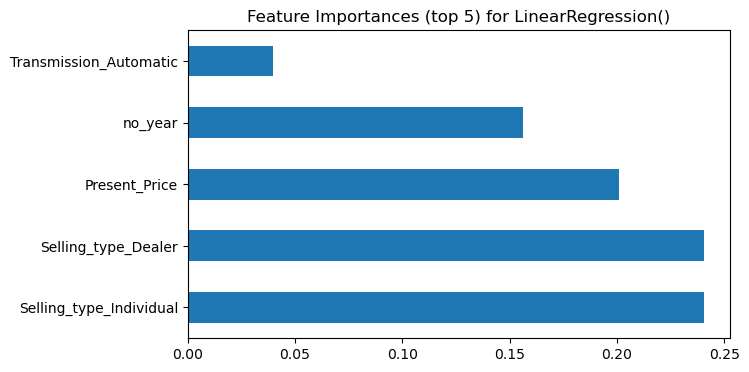

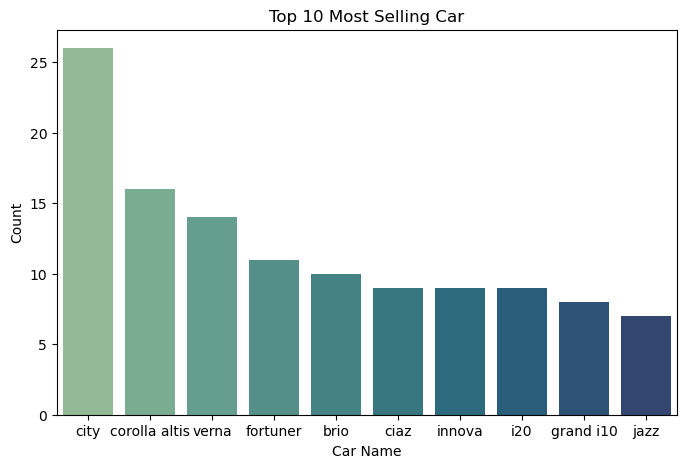

In [144]:
top10 = df['Car_Name'].value_counts()[:10]

plt.figure(figsize=(8, 5))
sns.countplot(x='Car_Name', data=df, order=top10.index, palette='crest')

plt.xlabel('Car Name')
plt.ylabel('Count')
plt.title('Top 10 Most Selling Car')

plt.show()

##### What is/are the insight(s) found from the chart?

From the above chart, we got to know that 'city' is the top most selling car, followed by corolla altis, verna, fortuner and brio.

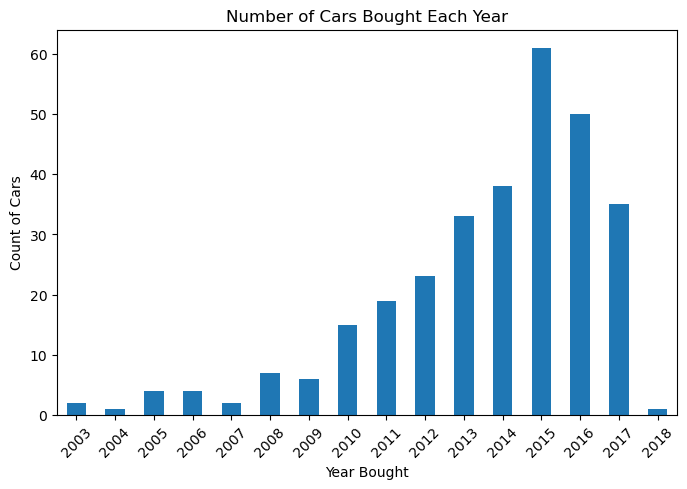

In [147]:
plt.figure(figsize=(8, 5))

yearly_counts = df.groupby('Year').count()['Car_Name']

yearly_counts.plot(kind='bar')

plt.xticks(rotation=45)

plt.xlabel('Year Bought')
plt.ylabel('Count of Cars')
plt.title('Number of Cars Bought Each Year')

plt.show()

##### What is/are the insight(s) found from the chart?

From the above chart, we got to know that 2015 has the highest count of car purchases (popular year for buying cars), followed by 2016 and 2014.

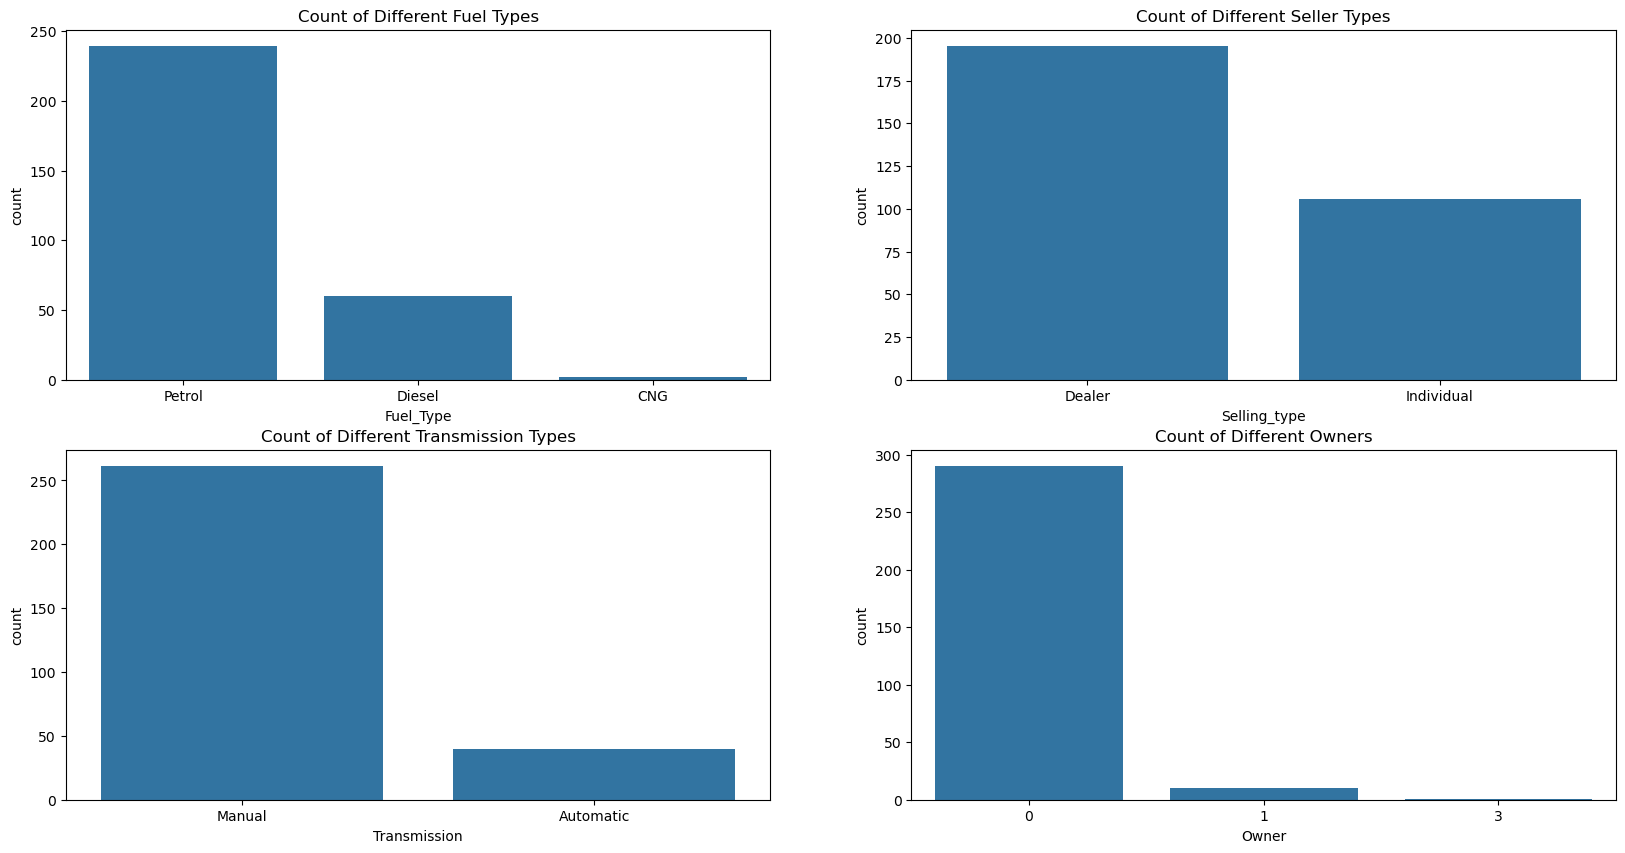

In [150]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.countplot(data=df, x = 'Fuel_Type')
plt.title("Count of Different Fuel Types")

plt.subplot(2,2,2)
sns.countplot(data=df, x = 'Selling_type')
plt.title("Count of Different Seller Types")

plt.subplot(2,2,3)
sns.countplot(data=df, x = 'Transmission')
plt.title("Count of Different Transmission Types")

plt.subplot(2,2,4)
sns.countplot(data=df, x = 'Owner')
plt.title("Count of Different Owners")

plt.show()

##### What is/are the insight(s) found from the chart?

From the above plots we can analyse that:

* The number of cars having their 'Fuel_Type' type as Petrol is greater when compared to the other types namely: Diesel and CNG.
* We can observe that most of the cars are sold through Dealers when compared to the Individual sellers.
* We clearly see that Manual cars are much more in number when compared to Automatic cars.
* Most of the cars are sold by the First Owners and negligible number of cars are sold by the Third or Fourth Owners.

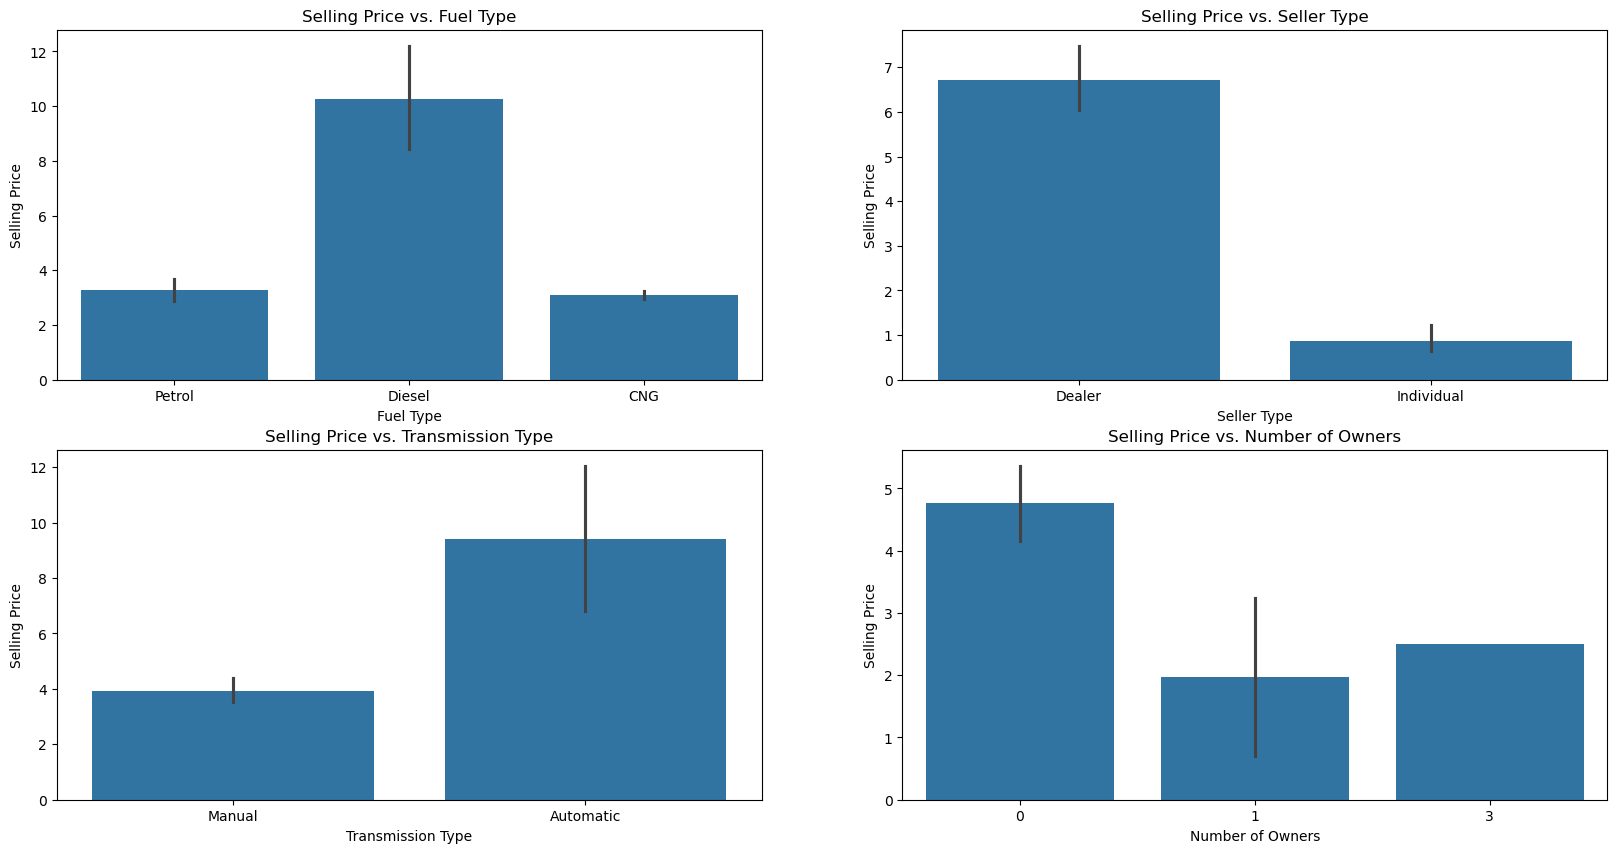

In [153]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
sns.barplot(data=df, x='Fuel_Type', y='Selling_Price')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.title('Selling Price vs. Fuel Type')

plt.subplot(2,2,2)
sns.barplot(data=df, x='Selling_type', y='Selling_Price')
plt.xlabel('Seller Type')
plt.ylabel('Selling Price')
plt.title('Selling Price vs. Seller Type')

plt.subplot(2,2,3)
sns.barplot(data=df, x='Transmission', y='Selling_Price')
plt.xlabel('Transmission Type')
plt.ylabel('Selling Price')
plt.title('Selling Price vs. Transmission Type')

plt.subplot(2,2,4)
sns.barplot(data=df, x='Owner', y='Selling_Price')
plt.xlabel('Number of Owners')
plt.ylabel('Selling Price')
plt.title('Selling Price vs. Number of Owners')

plt.show()

##### What is/are the insight(s) found from the chart?

From the above plots we can analyse that:

* The cars with 'Fuel_Type' Diesel has a higher 'Selling_Price' compared to the rest and at the same time cars running on Petrol and CNG are costs less and almost same.
* The cars sold by the 'Seller_Type' Dealers have a higher range whereas Individual sellers cost low.
* The cars with Automatic 'Transmission' costs more than the cars with Manual Transmission.
* First Owner cars holds a higher value in terms of 'Selling_Price' whereas we can also observe that the 'Selling_Price' reduces with an increase in the number of 'Owner'.

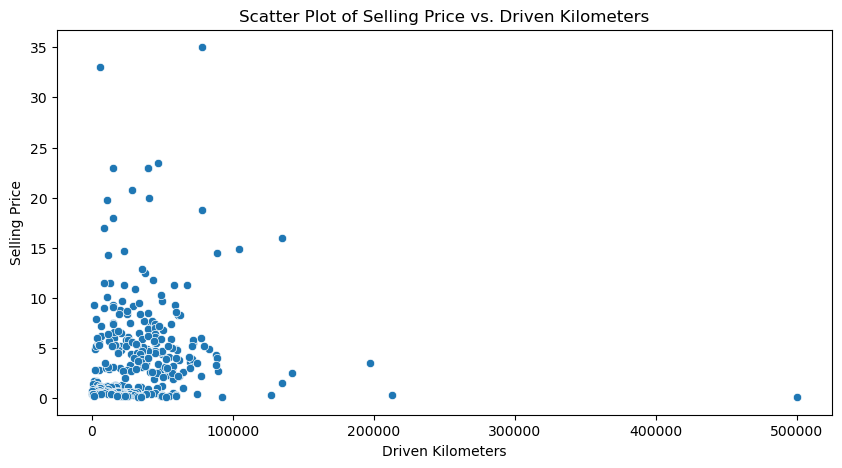

In [156]:
plt.figure(figsize=(10,5))

sns.scatterplot(data=df, x='Driven_kms', y='Selling_Price')

plt.xlabel('Driven Kilometers')
plt.ylabel('Selling Price')

plt.title('Scatter Plot of Selling Price vs. Driven Kilometers')

plt.show()

##### What is/are the insight(s) found from the chart?

From the above Scatterplot, it can clearly seen that as the number of Driven Kilometers increases, the Selling Price of the car tends to decrease.

<Figure size 1000x500 with 0 Axes>

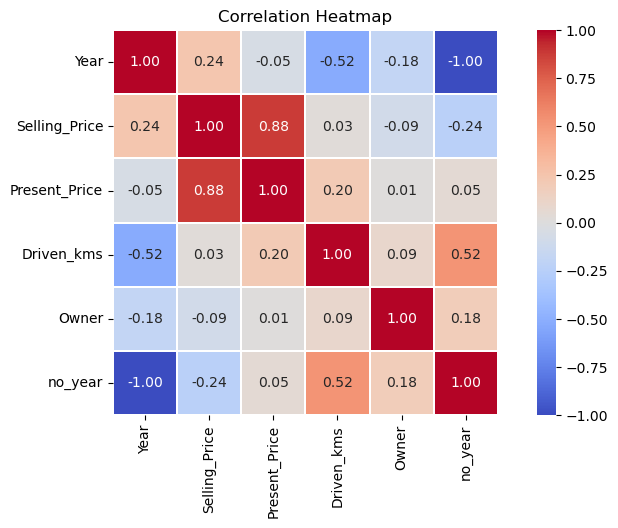

In [159]:
plt.figure(figsize=(10, 5))

numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 5))
sns.heatmap(numeric_df.corr(), annot=True, linewidths=0.1, fmt='.2f', square=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


##### What is/are the insight(s) found from the chart?

From the above correlation heatmap we get to know that, Present price and selling price are positively highly correlated, as 'Present_Price' is likely one of the significant factors that influence the 'Selling_Price' of a car. And 'no_year' and 'Year' are negatively highly correlated.

In [162]:
q1, q3, median = df.Selling_Price.quantile([0.25,0.75,0.5])
lower_limit = q1 - 1.5*(q3-q1)
upper_limit = q3 + 1.5*(q3-q1)
df['Selling_Price'] = np.where(df['Selling_Price'] > upper_limit, median,np.where(df['Selling_Price'] < lower_limit,median,df['Selling_Price']))

for col in ['Present_Price','Driven_kms','Owner','no_year']:
  upper_limit = df[col].quantile(0.99)
  df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])

##### What all outlier treatment techniques have you used and why did you use those techniques?

Here i used IQR method and Capping method, Based on IQR method i set Upper limit and Lower limit of Selling Price and convert those outliers into median values.

Also i have capp outliers upto 99th percentile and above that i convert those outliers into upper limit value.

In [165]:
df.drop(['Car_Name'], axis=1, inplace=True)

In [166]:
df = pd.get_dummies(df)

#### What all categorical encoding techniques have i used & why did i use those techniques?

One hot encoding is used to encode the categorical variables into numerical format.

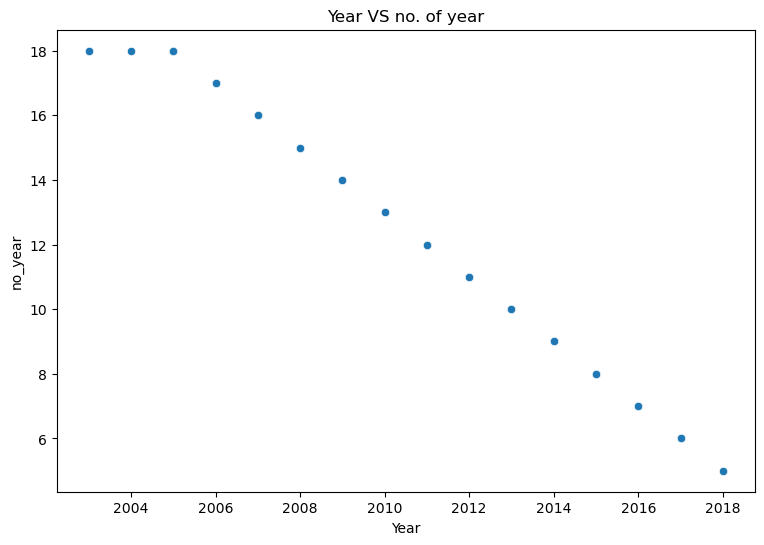

In [169]:
plt.figure(figsize=(9,6))
sns.scatterplot(x='Year',y='no_year',data=df)
plt.xlabel('Year')
plt.ylabel('no_year')
plt.title('Year VS no. of year')
plt.show()

In [170]:
df[['Year','no_year']].corr()

,Year,no_year
Year,1.000000,-0.998376
no_year,-0.998376,1.000000


In [171]:
df.drop(['Year'], axis=1, inplace=True)

In [172]:
features = [i for i in df.columns if i not in ['Selling_Price']]
features

['Present_Price',
 'Driven_kms',
 'Owner',
 'no_year',
 'Fuel_Type_CNG',
 'Fuel_Type_Diesel',
 'Fuel_Type_Petrol',
 'Selling_type_Dealer',
 'Selling_type_Individual',
 'Transmission_Automatic',
 'Transmission_Manual']

In [173]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [174]:
continuous_variables = ['Present_Price', 'Driven_kms', 'Owner', 'no_year']

In [175]:
continuous_feature_df = pd.DataFrame(df[continuous_variables])

In [176]:
continuous_feature_df

,Present_Price,Driven_kms,Owner,no_year
0,5.59,27000.0,0.0,9.0
1,9.54,43000.0,0.0,10.0
2,9.85,6900.0,0.0,6.0
3,4.15,5200.0,0.0,12.0
4,6.87,42450.0,0.0,9.0
...,...,...,...,...
296,11.60,33988.0,0.0,7.0
297,5.90,60000.0,0.0,8.0
298,11.00,87934.0,0.0,14.0
299,12.50,9000.0,0.0,6.0


In [177]:
calc_vif(df[[i for i in continuous_feature_df]])

,variables,VIF
0,Present_Price,2.153995
1,Driven_kms,4.818128
2,Owner,1.061741
3,no_year,4.530533


In [178]:
df.head()

,Selling_Price,Present_Price,Driven_kms,Owner,no_year,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual
0,3.35,5.59,27000.0,0.0,9.0,False,False,True,True,False,False,True
1,4.75,9.54,43000.0,0.0,10.0,False,True,False,True,False,False,True
2,7.25,9.85,6900.0,0.0,6.0,False,False,True,True,False,False,True
3,2.85,4.15,5200.0,0.0,12.0,False,False,True,True,False,False,True
4,4.60,6.87,42450.0,0.0,9.0,False,True,False,True,False,False,True


##### What all feature selection methods have i used  and why?

I have used pearson correlation coefficient to check correlation between variables and also with dependent variable.

And also i check the multicollinearity using VIF.

##### Which all features i found important and why?

From above methods i have found that there is negitively high correlation between Year and no_year. So, i take only 'no_year' variable and drop the 'Year' column, as we've already calculated the age in the 'no_year' column.

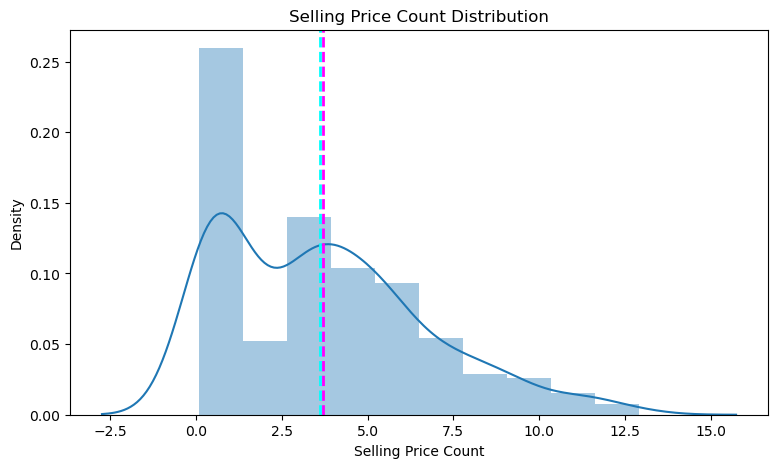

In [183]:
plt.figure(figsize=(9,5))
sns.distplot(df[dependent_variable])
plt.xlabel('Selling Price Count')
plt.title('Selling Price Count Distribution')
plt.axvline(df[dependent_variable[0]].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df[dependent_variable[0]].median(), color='cyan', linestyle='dashed', linewidth=2)
plt.show()

In [184]:
df[dependent_variable].skew()

Selling_Price    0.757016
dtype: float64

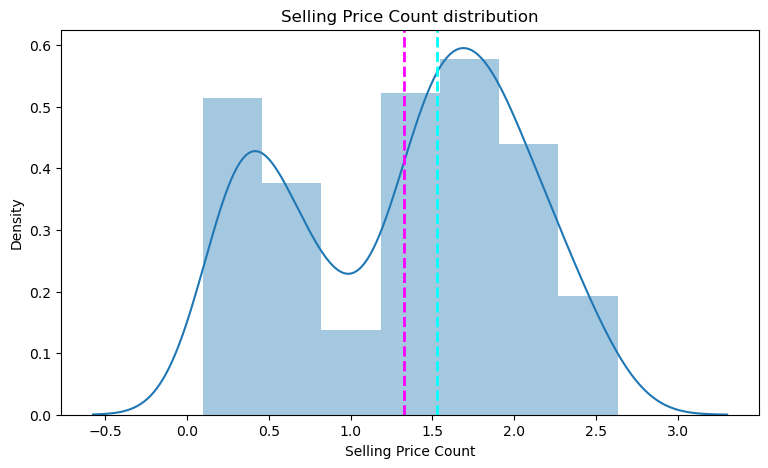

In [185]:
plt.figure(figsize=(9,5))
sns.distplot(np.log1p(df[dependent_variable]))
plt.xlabel('Selling Price Count')
plt.title('Selling Price Count distribution')
plt.axvline(np.log1p(df['Selling_Price']).mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(np.log1p(df['Selling_Price']).median(), color='cyan', linestyle='dashed', linewidth=2)
plt.show()

In [186]:
np.log1p(df[dependent_variable]).skew()

Selling_Price   -0.222356
dtype: float64

In [187]:
X = df.drop('Selling_Price',axis=1)
y = np.log1p(df[dependent_variable])

In [188]:
features

['Present_Price',
 'Driven_kms',
 'Owner',
 'no_year',
 'Fuel_Type_CNG',
 'Fuel_Type_Diesel',
 'Fuel_Type_Petrol',
 'Selling_type_Dealer',
 'Selling_type_Individual',
 'Transmission_Automatic',
 'Transmission_Manual']

I have ploted distribution plot and also i did normality test and i have found that the data is not normally distributed, it needs transformation.

So, i have calculate the skewness value and i have found that the selling price attribute is positively skewed so i used log transformation & now the data looks normally distrubuted & skewness is also reduced.

In [190]:
features = [i for i in df.columns if i not in ['Selling_Price']]

In [191]:
scaler = StandardScaler()
X = scaler.fit_transform(df[features])

##### Which method have i used to scale the data and why?

In this i have different independent features of different scale so i have used standard scalar method to scale our independent features into one scale.

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [195]:
y_train.value_counts()

Selling_Price
1.526056         11
0.470004          6
0.371564          6
0.182322          5
1.609438          5
                 ..
1.294727          1
1.266948          1
1.208960          1
1.131402          1
2.602690          1
Name: count, Length: 116, dtype: int64

In [196]:
def evaluate_model(model, y_test, y_pred):

  y_t = np.exp(y_test)
  y_p = np.exp(y_pred)
  y_train2 = np.exp(y_train)
  y_train_pred = np.exp(model.predict(X_train))

  mse = mean_squared_error(y_t,y_p)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y_t,y_p)
  r2_train = r2_score(y_train2, y_train_pred)
  r2 = r2_score(y_t,y_p)
  r2_adjusted = 1-(1-r2)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1))

  print("MSE :" , mse)
  print("RMSE :" ,rmse)
  print("MAE :" ,mae)
  print("Train R2 :" ,r2_train)
  print("Test R2 :" ,r2)
  print("Adjusted R2 : ", r2_adjusted)


  plt.figure(figsize=(12,4))
  plt.plot((y_p)[:100])
  plt.plot((np.array(y_t)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.title('Actual and Predicted Selling Price', fontsize=12)

  try:
    importance = model.feature_importances_
  except:
    importance = model.coef_
  importance = np.absolute(importance)
  if len(importance)==len(features):
    pass
  else:
    importance = importance[0]

  feat = pd.Series(importance, index=features)
  plt.figure(figsize=(7,4))
  plt.title('Feature Importances (top 5) for '+str(model), fontsize = 12)
  plt.xlabel('Relative Importance')
  feat.nlargest(5).plot(kind='barh')


  model_score = [mse,rmse,mae,r2_train,r2,r2_adjusted]
  return model_score

In [197]:
score = pd.DataFrame(index = ['MSE', 'RMSE', 'MAE', 'Train R2', 'Test R2', 'Adjusted R2'])

In [198]:
reg = LinearRegression()

reg.fit(X_train, y_train)

y_pred_li = reg.predict(X_test)

In [199]:
linear_score = evaluate_model(reg, y_test,y_pred_li)
score['Linear regression'] = linear_score

MSE : 4.169924716556083
RMSE : 2.042039352352467
MAE : 1.28914859192798
Train R2 : 0.6421421951879261
Test R2 : 0.492441798334486
Adjusted R2 :  0.4217691373430853


In [200]:
score

,Linear regression
MSE,4.169925
RMSE,2.042039
MAE,1.289149
Train R2,0.642142
Test R2,0.492442
Adjusted R2,0.421769


In [201]:
reg = LinearRegression()

param_grid = {'fit_intercept': [True, False]}

grid_search = GridSearchCV(reg, param_grid, cv=5, scoring='r2', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]},
             return_train_score=True, scoring='r2')

In [202]:
print("Best parameters: ", grid_search.best_params_)
print("Best R2 score: ", grid_search.best_score_)

Best parameters:  {'fit_intercept': True}
Best R2 score:  0.8058936696873662


In [203]:
best_reg = grid_search.best_estimator_
best_reg.fit(X_train, y_train)

LinearRegression()

In [204]:
y_pred_li2 = best_reg.predict(X_test)

In [205]:
linear_score2 = evaluate_model(best_reg, y_test,y_pred_li2)

MSE : 4.169924716556083
RMSE : 2.042039352352467
MAE : 1.28914859192798
Train R2 : 0.6421421951879261
Test R2 : 0.492441798334486
Adjusted R2 :  0.4217691373430853


In [206]:
score['Linear regression tuned'] = linear_score2
score

,Linear regression,Linear regression tuned
MSE,4.169925,4.169925
RMSE,2.042039,2.042039
MAE,1.289149,1.289149
Train R2,0.642142,0.642142
Test R2,0.492442,0.492442
Adjusted R2,0.421769,0.421769


##### Which hyperparameter optimization technique have i used and why?

GridSearchCV is used to find the best hyperparameters for a machine learning model by searching over a specified parameter grid. It helps to ensure that a model is not overfitting or underfitting by evaluating the model's performance using cross-validation techniques. GridSearchCV can save time and resources compared to manually tuning the parameters of a model.

To reduce time and effort i have used GridSearchCV.

##### Have i seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

For untuned model, I found R2 score of 0.642142 & 0.492442 for train and test set. And 4.169925 and 1.289149 as MSE and MAE respectively.

For tuned model, I found R2 score of 0.642142 & 0.492442 for train and test set. And 4.169925 and 1.289149 as MSE and MAE respectively.

For Both tuned and untuned model, **no improvement** is seen.

In [211]:
lasso = Lasso()

lasso.fit(X_train, y_train)

y_pred_lasso1 = lasso.predict(X_test)

In [212]:
lasso_score = evaluate_model(lasso, y_test,y_pred_lasso1)
score['Lasso regression'] = lasso_score

MSE : 9.807266785467892
RMSE : 3.1316555981569705
MAE : 2.513357873886036
Train R2 : -0.10059179585999933
Test R2 : -0.19372867167662267
Adjusted R2 :  -0.35994405634045634


In [213]:
score

,Linear regression,Linear regression tuned,Lasso regression
MSE,4.169925,4.169925,9.807267
RMSE,2.042039,2.042039,3.131656
MAE,1.289149,1.289149,2.513358
Train R2,0.642142,0.642142,-0.100592
Test R2,0.492442,0.492442,-0.193729
Adjusted R2,0.421769,0.421769,-0.359944


It is seen that using Lasso regression analysis the performance of the model has drop down. So i will try to tuned the model.

#### 2. Cross- Validation & Hyperparameter Tuning

In [216]:
lasso = Lasso()

parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)

lasso_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [217]:
print("The optimum alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The optimum alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -0.09201807273836611


In [218]:
lasso = Lasso(alpha = lasso_regressor.best_params_['alpha'])

lasso.fit(X_train, y_train)

y_pred_lassocv = lasso.predict(X_test)

In [219]:
lasso2 = evaluate_model(lasso, y_test,y_pred_lassocv)

name = 'Lasso with alpha = ' + str(lasso_regressor.best_params_['alpha'])

score[name] = lasso2

MSE : 4.143092228273676
RMSE : 2.0354587267428625
MAE : 1.2972252346842905
Train R2 : 0.6362928099908935
Test R2 : 0.49570781641024564
Adjusted R2 :  0.4254899174293937


##### Which hyperparameter optimization technique have you used and why?

GridSearchCV is used to find the best hyperparameters for a machine learning model by searching over a specified parameter grid. It helps to ensure that a model is not overfitting or underfitting by evaluating the model's performance using cross-validation techniques. GridSearchCV can save time and resources compared to manually tuning the parameters of a model.

To reduce time and effort i have used GridSearchCV.

##### Have i seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [223]:
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = 0.01
MSE,4.169925,4.169925,9.807267,4.143092
RMSE,2.042039,2.042039,3.131656,2.035459
MAE,1.289149,1.289149,2.513358,1.297225
Train R2,0.642142,0.642142,-0.100592,0.636293
Test R2,0.492442,0.492442,-0.193729,0.495708
Adjusted R2,0.421769,0.421769,-0.359944,0.425490


After tuning i have seen that there is increase in test set performance, which is upto 49%

In [225]:
ridge = Ridge()

ridge.fit(X_train, y_train)

y_pred_ridge1 = ridge.predict(X_test)

In [226]:
result = evaluate_model(ridge, y_test,y_pred_ridge1)
score['Ridge'] = result

MSE : 4.160398593300265
RMSE : 2.039705516318536
MAE : 1.2889405804291554
Train R2 : 0.6419159865096082
Test R2 : 0.49360130655519074
Adjusted R2 :  0.4230900960755337


In [227]:
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = 0.01,Ridge
MSE,4.169925,4.169925,9.807267,4.143092,4.160399
RMSE,2.042039,2.042039,3.131656,2.035459,2.039706
MAE,1.289149,1.289149,2.513358,1.297225,1.288941
Train R2,0.642142,0.642142,-0.100592,0.636293,0.641916
Test R2,0.492442,0.492442,-0.193729,0.495708,0.493601
Adjusted R2,0.421769,0.421769,-0.359944,0.425490,0.423090


I have used Ridge regression technique to check the performance of the model and i have found that there is no majorly difference in between linear regression and Ridge. Both models are quite similar.

In [229]:
ridge = Ridge()

parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)

ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [230]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 10}

Using  {'alpha': 10}  the negative mean squared error is:  -0.0923947181715041


In [231]:
ridge = Ridge(alpha = ridge_regressor.best_params_['alpha'])

ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

In [232]:
result = evaluate_model(ridge, y_test,y_pred_ridge)

namer = 'Ridge with alpha = ' + str(ridge_regressor.best_params_['alpha'])

score[namer] = result

MSE : 4.089084352387011
RMSE : 2.0221484496413735
MAE : 1.2916996819222404
Train R2 : 0.639256952993154
Test R2 : 0.5022815898531987
Adjusted R2 :  0.4329790264150365


##### Which hyperparameter optimization technique have i used and why?

GridSearchCV is used to find the best hyperparameters for a machine learning model by searching over a specified parameter grid. It helps to ensure that a model is not overfitting or underfitting by evaluating the model's performance using cross-validation techniques. GridSearchCV can save time and resources compared to manually tuning the parameters of a model.

To reduce time and effort we have used GridSearchCV.

##### Have i seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [236]:
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = 0.01,Ridge,Ridge with alpha = 10
MSE,4.169925,4.169925,9.807267,4.143092,4.160399,4.089084
RMSE,2.042039,2.042039,3.131656,2.035459,2.039706,2.022148
MAE,1.289149,1.289149,2.513358,1.297225,1.288941,1.291700
Train R2,0.642142,0.642142,-0.100592,0.636293,0.641916,0.639257
Test R2,0.492442,0.492442,-0.193729,0.495708,0.493601,0.502282
Adjusted R2,0.421769,0.421769,-0.359944,0.425490,0.423090,0.432979


I have tuned Ridge regression using hyperparametric technique & check the performance of the model and i have found that the tuned Ridge regression model give the better accuracy compare to the untuned model for the test set.

In [238]:
dt = DecisionTreeRegressor(random_state=1)

dt.fit(X_train,y_train)

y_pred_dt1 = dt.predict(X_test)

In [239]:
result = evaluate_model(dt, y_test,y_pred_dt1)
score['Decision tree'] = result

MSE : 0.7083516483516488
RMSE : 0.8416362922020704
MAE : 0.5716483516483518
Train R2 : 1.0
Test R2 : 0.9137802926377292
Adjusted R2 :  0.9017750169290586


In [240]:
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = 0.01,Ridge,Ridge with alpha = 10,Decision tree
MSE,4.169925,4.169925,9.807267,4.143092,4.160399,4.089084,0.708352
RMSE,2.042039,2.042039,3.131656,2.035459,2.039706,2.022148,0.841636
MAE,1.289149,1.289149,2.513358,1.297225,1.288941,1.291700,0.571648
Train R2,0.642142,0.642142,-0.100592,0.636293,0.641916,0.639257,1.000000
Test R2,0.492442,0.492442,-0.193729,0.495708,0.493601,0.502282,0.913780
Adjusted R2,0.421769,0.421769,-0.359944,0.425490,0.423090,0.432979,0.901775


From the decision tree algorithm i got train R2 score is 1 and test R2 score is 90% which shows the overfitting condition on train dataset.

So, i have decided to tune the data using GridSearchCV.

In [242]:
dt_model = DecisionTreeRegressor(random_state=1)

grid = {'max_depth' : [8,10,12,14,16],
        'min_samples_split' : np.arange(35,50),
        'min_samples_leaf' : np.arange(22,31,2)}

dt_gridsearch = GridSearchCV(dt_model,
                             grid,
                             cv=6,
                             scoring= 'neg_root_mean_squared_error')
dt_gridsearch.fit(X_train,y_train)
dt_best_params = dt_gridsearch.best_params_

In [243]:
dt_best_params

{'max_depth': 8, 'min_samples_leaf': 24, 'min_samples_split': 35}

In [244]:
dt_model = DecisionTreeRegressor(max_depth=dt_best_params['max_depth'],
                                 min_samples_leaf=dt_best_params['min_samples_leaf'],
                                 min_samples_split=dt_best_params['min_samples_split'],
                                 random_state=1)

In [245]:
dt_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=24, min_samples_split=35,
                      random_state=1)

In [246]:
y_pred_dt = dt_model.predict(X_test)

In [247]:
result = evaluate_model(dt_model, y_test,y_pred_dt)
score['Decision tree tuned'] = result

MSE : 2.4342263298438334
RMSE : 1.560200733830052
MAE : 1.0801267388624902
Train R2 : 0.7600297006358052
Test R2 : 0.7037089102551515
Adjusted R2 :  0.6624531888982739


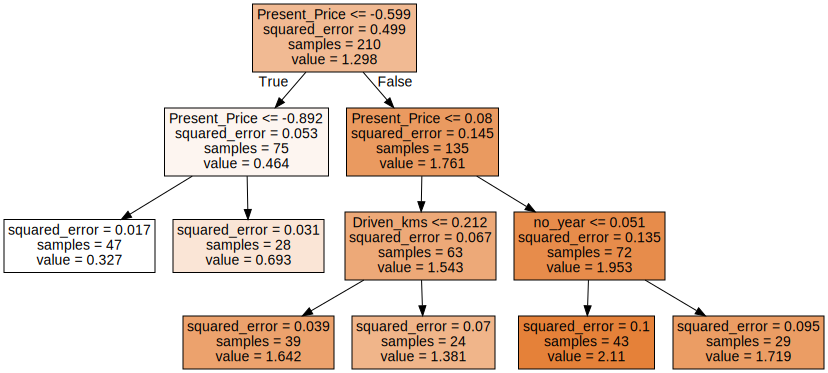

In [248]:
graph = Source(tree.export_graphviz(dt_model,
                                    out_file=None,
                                    feature_names=features,
                                    filled= True))
display(SVG(graph.pipe(format='svg')))

##### Which hyperparameter optimization technique have i used and why?

GridSearchCV is used to find the best hyperparameters for a machine learning model by searching over a specified parameter grid. It helps to ensure that a model is not overfitting or underfitting by evaluating the model's performance using cross-validation techniques. GridSearchCV can save time and resources compared to manually tuning the parameters of a model.

To reduce time and effort we have used GridSearchCV.

##### Have i seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [252]:
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = 0.01,Ridge,Ridge with alpha = 10,Decision tree,Decision tree tuned
MSE,4.169925,4.169925,9.807267,4.143092,4.160399,4.089084,0.708352,2.434226
RMSE,2.042039,2.042039,3.131656,2.035459,2.039706,2.022148,0.841636,1.560201
MAE,1.289149,1.289149,2.513358,1.297225,1.288941,1.291700,0.571648,1.080127
Train R2,0.642142,0.642142,-0.100592,0.636293,0.641916,0.639257,1.000000,0.760030
Test R2,0.492442,0.492442,-0.193729,0.495708,0.493601,0.502282,0.913780,0.703709
Adjusted R2,0.421769,0.421769,-0.359944,0.425490,0.423090,0.432979,0.901775,0.662453


From the above tuned Decision tree regression, it has seen that earlier we have faced overfitting condition. After tuning it there is no such condition and it looks like model performs with good accuracy around 76% on train and 70% on test data.

In [254]:
rf = RandomForestRegressor(random_state=0)

rf.fit(X_train,y_train)

y_pred_rf1 = rf.predict(X_test)

In [255]:
result = evaluate_model(rf, y_test,y_pred_rf1)
score['Random forest'] = result

MSE : 0.5686494969625685
RMSE : 0.7540885206410243
MAE : 0.4947583987177409
Train R2 : 0.9852823123413166
Test R2 : 0.9307846698261996
Adjusted R2 :  0.9211470922070628


In [256]:
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = 0.01,Ridge,Ridge with alpha = 10,Decision tree,Decision tree tuned,Random forest
MSE,4.169925,4.169925,9.807267,4.143092,4.160399,4.089084,0.708352,2.434226,0.568649
RMSE,2.042039,2.042039,3.131656,2.035459,2.039706,2.022148,0.841636,1.560201,0.754089
MAE,1.289149,1.289149,2.513358,1.297225,1.288941,1.291700,0.571648,1.080127,0.494758
Train R2,0.642142,0.642142,-0.100592,0.636293,0.641916,0.639257,1.000000,0.760030,0.985282
Test R2,0.492442,0.492442,-0.193729,0.495708,0.493601,0.502282,0.913780,0.703709,0.930785
Adjusted R2,0.421769,0.421769,-0.359944,0.425490,0.423090,0.432979,0.901775,0.662453,0.921147


Here i have seen that using random forest, regression accuracy of the train and test model increases 98% and 93% respectively, which seems to be a good model for prediction.

In [258]:
rf_model = RandomForestRegressor(random_state=0)
rf_params = {'n_estimators':[300],                    # limited due to computational power availability
             'min_samples_leaf':np.arange(20,25)}     # Approximate range from a decision tree model

In [259]:
rf_gridsearch = GridSearchCV(rf_model,rf_params,cv=6,scoring='neg_root_mean_squared_error')
rf_gridsearch.fit(X_train,y_train)
rf_best_params = rf_gridsearch.best_params_

In [260]:
rf_best_params

{'min_samples_leaf': 20, 'n_estimators': 300}

In [261]:
rf_model = RandomForestRegressor(n_estimators=rf_best_params['n_estimators'],
                                 min_samples_leaf=rf_best_params['min_samples_leaf'],
                                 random_state=0)

In [262]:
rf_model.fit(X_train,y_train)

RandomForestRegressor(min_samples_leaf=20, n_estimators=300, random_state=0)

In [263]:
y_pred_rf = rf_model.predict(X_test)

In [264]:
result = evaluate_model(rf_model, y_test,y_pred_rf)
score['Random forest tuned'] = result

MSE : 2.1598547137265687
RMSE : 1.4696444174447671
MAE : 1.010518309341
Train R2 : 0.7710484475746358
Test R2 : 0.7371050920882741
Adjusted R2 :  0.7004994719992996


##### Which hyperparameter optimization technique have i used and why?

GridSearchCV is used to find the best hyperparameters for a machine learning model by searching over a specified parameter grid. It helps to ensure that a model is not overfitting or underfitting by evaluating the model's performance using cross-validation techniques. GridSearchCV can save time and resources compared to manually tuning the parameters of a model.

To reduce time and effort we have used GridSearchCV.

##### Have i seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [268]:
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = 0.01,Ridge,Ridge with alpha = 10,Decision tree,Decision tree tuned,Random forest,Random forest tuned
MSE,4.169925,4.169925,9.807267,4.143092,4.160399,4.089084,0.708352,2.434226,0.568649,2.159855
RMSE,2.042039,2.042039,3.131656,2.035459,2.039706,2.022148,0.841636,1.560201,0.754089,1.469644
MAE,1.289149,1.289149,2.513358,1.297225,1.288941,1.291700,0.571648,1.080127,0.494758,1.010518
Train R2,0.642142,0.642142,-0.100592,0.636293,0.641916,0.639257,1.000000,0.760030,0.985282,0.771048
Test R2,0.492442,0.492442,-0.193729,0.495708,0.493601,0.502282,0.913780,0.703709,0.930785,0.737105
Adjusted R2,0.421769,0.421769,-0.359944,0.425490,0.423090,0.432979,0.901775,0.662453,0.921147,0.700499


After tuning the random forest model it has seen that there is drop in performance both in train and test score so i am not going to use this model.

In [270]:
gb = GradientBoostingRegressor(random_state=0)

gb.fit(X_train,y_train)

y_pred_gb1 = gb.predict(X_test)

In [271]:
result = evaluate_model(gb, y_test,y_pred_gb1)
score['Gradient Boosting Regressor'] = result

MSE : 0.7834226536964246
RMSE : 0.8851116617107836
MAE : 0.5454911452882067
Train R2 : 0.9878401898231808
Test R2 : 0.9046427405090938
Adjusted R2 :  0.8913651474154233


In [272]:
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = 0.01,Ridge,Ridge with alpha = 10,Decision tree,Decision tree tuned,Random forest,Random forest tuned,Gradient Boosting Regressor
MSE,4.169925,4.169925,9.807267,4.143092,4.160399,4.089084,0.708352,2.434226,0.568649,2.159855,0.783423
RMSE,2.042039,2.042039,3.131656,2.035459,2.039706,2.022148,0.841636,1.560201,0.754089,1.469644,0.885112
MAE,1.289149,1.289149,2.513358,1.297225,1.288941,1.291700,0.571648,1.080127,0.494758,1.010518,0.545491
Train R2,0.642142,0.642142,-0.100592,0.636293,0.641916,0.639257,1.000000,0.760030,0.985282,0.771048,0.987840
Test R2,0.492442,0.492442,-0.193729,0.495708,0.493601,0.502282,0.913780,0.703709,0.930785,0.737105,0.904643
Adjusted R2,0.421769,0.421769,-0.359944,0.425490,0.423090,0.432979,0.901775,0.662453,0.921147,0.700499,0.891365


Using Gradient Boosting Regressor i have got accuracy around 98% and 90% on train and test data respectively, which is less than random forest, decision tree algorithm.

So, lets tune it.

In [274]:
gb_model = GradientBoostingRegressor(random_state=0)
gb_params = {'n_estimators':[300],
             'min_samples_leaf':np.arange(20,24),
             'max_depth':np.arange(14,17)
             }

In [275]:
random_search = RandomizedSearchCV(gb_model, param_distributions=gb_params, cv=6, n_iter=20, scoring='neg_root_mean_squared_error', n_jobs=-1)
random_search.fit(X_train, y_train)

gb_best_params = random_search.best_params_

In [276]:
gb_best_params

{'n_estimators': 300, 'min_samples_leaf': 21, 'max_depth': 14}

In [277]:
gb_model = GradientBoostingRegressor(n_estimators=gb_best_params['n_estimators'],
                                     min_samples_leaf=gb_best_params['min_samples_leaf'],
                                     max_depth = gb_best_params['max_depth'],
                                     random_state=0)

In [278]:
gb_model.fit(X_train,y_train)

GradientBoostingRegressor(max_depth=14, min_samples_leaf=21, n_estimators=300,
                          random_state=0)

In [279]:
y_pred_gb = gb_model.predict(X_test)

In [280]:
result = evaluate_model(gb_model, y_test,y_pred_gb)
score['Gradient Boosting Regressor Tuned'] = result

MSE : 0.9661007064474811
RMSE : 0.9829042203833908
MAE : 0.6291755682620734
Train R2 : 0.961140887193467
Test R2 : 0.8824073884966332
Adjusted R2 :  0.8660337337303416


##### Which hyperparameter optimization technique have i used and why?

Randomized search cross-validation (CV) is used to efficiently explore the hyperparameter space of a machine learning model. It works by randomly sampling from the search space of hyperparameters, rather than exhaustively trying every possible combination. This allows for a more efficient search while still providing a good chance of finding good hyperparameter values. Additionally, by using cross-validation to evaluate the performance of each set of hyperparameters, one can ensure that the model is not overfitting to the training data.

Because of its randomly sampling technique and to save the time i have decided to use Randomized search CV.

##### Have i seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [284]:
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = 0.01,Ridge,Ridge with alpha = 10,Decision tree,Decision tree tuned,Random forest,Random forest tuned,Gradient Boosting Regressor,Gradient Boosting Regressor Tuned
MSE,4.169925,4.169925,9.807267,4.143092,4.160399,4.089084,0.708352,2.434226,0.568649,2.159855,0.783423,0.966101
RMSE,2.042039,2.042039,3.131656,2.035459,2.039706,2.022148,0.841636,1.560201,0.754089,1.469644,0.885112,0.982904
MAE,1.289149,1.289149,2.513358,1.297225,1.288941,1.291700,0.571648,1.080127,0.494758,1.010518,0.545491,0.629176
Train R2,0.642142,0.642142,-0.100592,0.636293,0.641916,0.639257,1.000000,0.760030,0.985282,0.771048,0.987840,0.961141
Test R2,0.492442,0.492442,-0.193729,0.495708,0.493601,0.502282,0.913780,0.703709,0.930785,0.737105,0.904643,0.882407
Adjusted R2,0.421769,0.421769,-0.359944,0.425490,0.423090,0.432979,0.901775,0.662453,0.921147,0.700499,0.891365,0.866034


After using the Randomised search CV, it gave accuracy 96% on train data & 88% on test data which is comparatively less than the untuned model.

In [286]:
xgb_model = xgb.XGBRegressor(random_state=0,
                             objective='reg:squarederror')

xgb_model.fit(X_train,y_train)

y_pred_xgb1 = xgb_model.predict(X_test)

In [287]:
result = evaluate_model(xgb_model, y_test,y_pred_xgb1)
score['Extreme Gradient Boosting Regressor'] = result

MSE : 0.9137531518936157
RMSE : 0.955904363361532
MAE : 0.5729007720947266
Train R2 : 0.9999845027923584
Test R2 : 0.8887791037559509
Adjusted R2 :  0.8732926498485517


In [288]:
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = 0.01,Ridge,Ridge with alpha = 10,Decision tree,Decision tree tuned,Random forest,Random forest tuned,Gradient Boosting Regressor,Gradient Boosting Regressor Tuned,Extreme Gradient Boosting Regressor
MSE,4.169925,4.169925,9.807267,4.143092,4.160399,4.089084,0.708352,2.434226,0.568649,2.159855,0.783423,0.966101,0.913753
RMSE,2.042039,2.042039,3.131656,2.035459,2.039706,2.022148,0.841636,1.560201,0.754089,1.469644,0.885112,0.982904,0.955904
MAE,1.289149,1.289149,2.513358,1.297225,1.288941,1.291700,0.571648,1.080127,0.494758,1.010518,0.545491,0.629176,0.572901
Train R2,0.642142,0.642142,-0.100592,0.636293,0.641916,0.639257,1.000000,0.760030,0.985282,0.771048,0.987840,0.961141,0.999985
Test R2,0.492442,0.492442,-0.193729,0.495708,0.493601,0.502282,0.913780,0.703709,0.930785,0.737105,0.904643,0.882407,0.888779
Adjusted R2,0.421769,0.421769,-0.359944,0.425490,0.423090,0.432979,0.901775,0.662453,0.921147,0.700499,0.891365,0.866034,0.873293


Using Extreme Gradient Boosting Regressor i have got accuracy around 99% and 88% on train and test data respectively. It is overfitting the model's training accuracy is almost 100%.

So, lets tune it.

In [290]:
xgb_model = xgb.XGBRegressor(random_state=0,
                             objective='reg:squarederror')
xgb_params = {'n_estimators':[500],
             'min_samples_leaf':np.arange(20,22)}

In [291]:
xgb_search = RandomizedSearchCV(xgb_model,xgb_params,cv=6,scoring='neg_root_mean_squared_error',n_iter=100, n_jobs=-1)
xgb_search.fit(X_train,y_train)
xgb_best_params = xgb_search.best_params_

In [292]:
xgb_best_params

{'n_estimators': 500, 'min_samples_leaf': 20}

In [293]:
xgb_model = xgb.XGBRegressor(n_estimators=xgb_best_params['n_estimators'],
                             min_samples_leaf=xgb_best_params['min_samples_leaf'],
                             random_state=0)

In [294]:
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, min_samples_leaf=20,
             missing=nan, monotone_constraints=None, multi_strategy=None,
             n_estimators=500, n_jobs=None, ...)

In [295]:
y_pred_xgb = xgb_model.predict(X_test)

In [296]:
result = evaluate_model(xgb_model, y_test,y_pred_xgb)
score['Extreme Gradient Boosting Regressor Tuned'] = result

MSE : 0.9137531518936157
RMSE : 0.955904363361532
MAE : 0.5729007720947266
Train R2 : 0.9999845027923584
Test R2 : 0.8887791037559509
Adjusted R2 :  0.8732926498485517


##### Which hyperparameter optimization technique have you used and why?

Randomized search cross-validation (CV) is used to efficiently explore the hyperparameter space of a machine learning model. It works by randomly sampling from the search space of hyperparameters, rather than exhaustively trying every possible combination. This allows for a more efficient search while still providing a good chance of finding good hyperparameter values. Additionally, by using cross-validation to evaluate the performance of each set of hyperparameters, one can ensure that the model is not overfitting to the training data.

Because of its randomly sampling technique and to save the time i have decided to use Randomized search CV.

##### Have i seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [300]:
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = 0.01,Ridge,Ridge with alpha = 10,Decision tree,Decision tree tuned,Random forest,Random forest tuned,Gradient Boosting Regressor,Gradient Boosting Regressor Tuned,Extreme Gradient Boosting Regressor,Extreme Gradient Boosting Regressor Tuned
MSE,4.169925,4.169925,9.807267,4.143092,4.160399,4.089084,0.708352,2.434226,0.568649,2.159855,0.783423,0.966101,0.913753,0.913753
RMSE,2.042039,2.042039,3.131656,2.035459,2.039706,2.022148,0.841636,1.560201,0.754089,1.469644,0.885112,0.982904,0.955904,0.955904
MAE,1.289149,1.289149,2.513358,1.297225,1.288941,1.291700,0.571648,1.080127,0.494758,1.010518,0.545491,0.629176,0.572901,0.572901
Train R2,0.642142,0.642142,-0.100592,0.636293,0.641916,0.639257,1.000000,0.760030,0.985282,0.771048,0.987840,0.961141,0.999985,0.999985
Test R2,0.492442,0.492442,-0.193729,0.495708,0.493601,0.502282,0.913780,0.703709,0.930785,0.737105,0.904643,0.882407,0.888779,0.888779
Adjusted R2,0.421769,0.421769,-0.359944,0.425490,0.423090,0.432979,0.901775,0.662453,0.921147,0.700499,0.891365,0.866034,0.873293,0.873293


After tuning the model i have got the same accuracy on train and test data. Both are overfitted model.

In [302]:
score.columns

Index(['Linear regression', 'Linear regression tuned', 'Lasso regression',
       'Lasso with alpha = 0.01', 'Ridge', 'Ridge with alpha = 10',
       'Decision tree', 'Decision tree tuned', 'Random forest',
       'Random forest tuned', 'Gradient Boosting Regressor',
       'Gradient Boosting Regressor Tuned',
       'Extreme Gradient Boosting Regressor',
       'Extreme Gradient Boosting Regressor Tuned'],
      dtype='object')

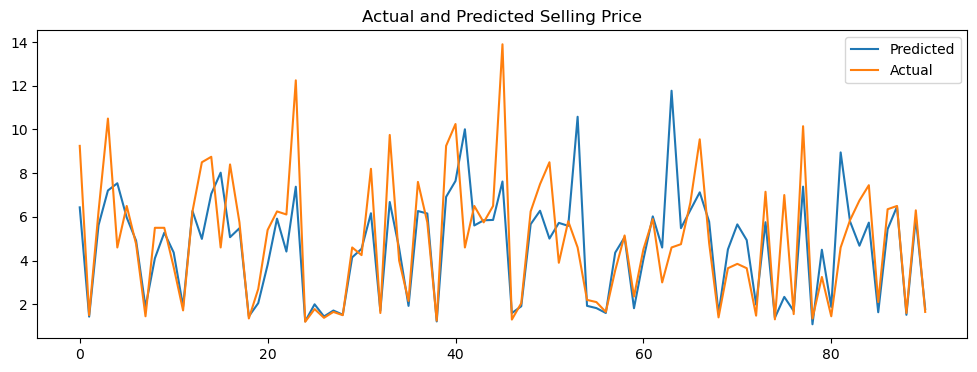

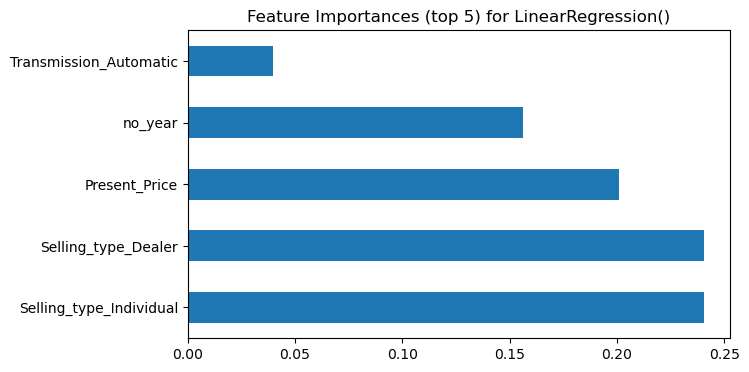

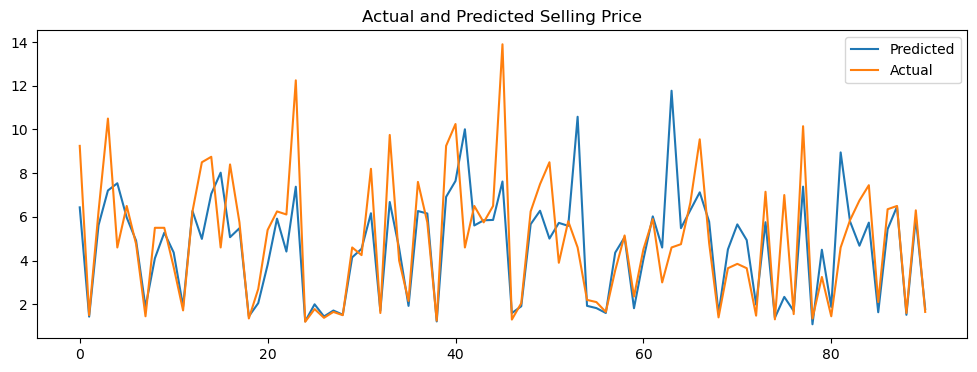

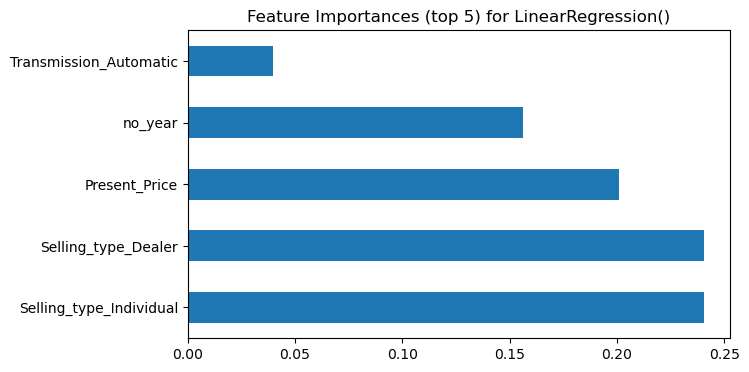

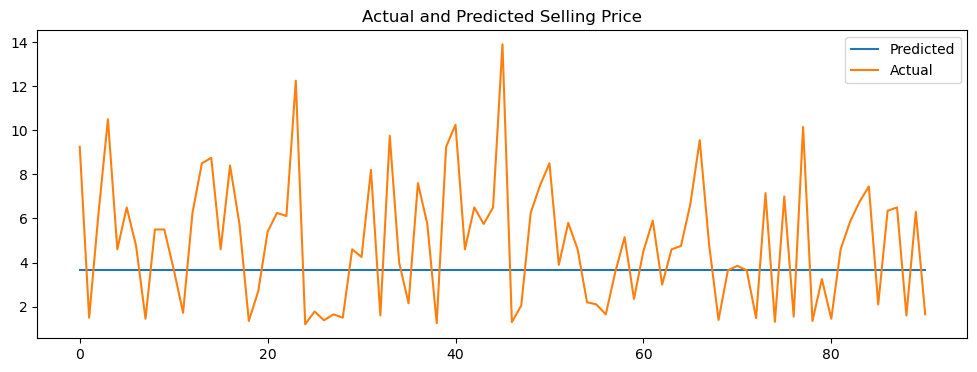

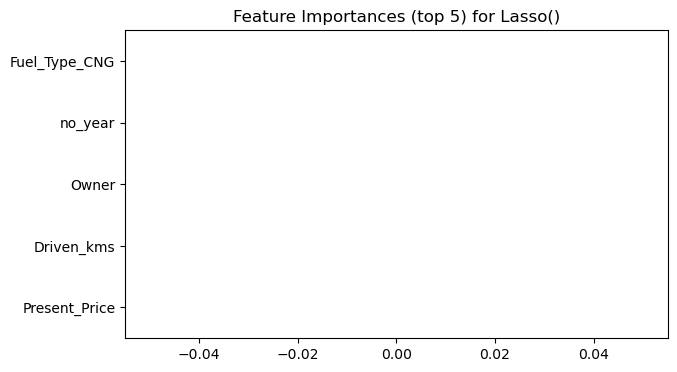

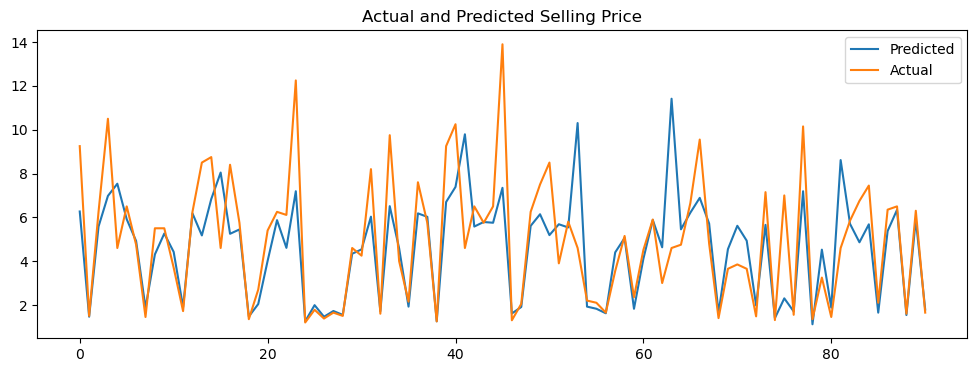

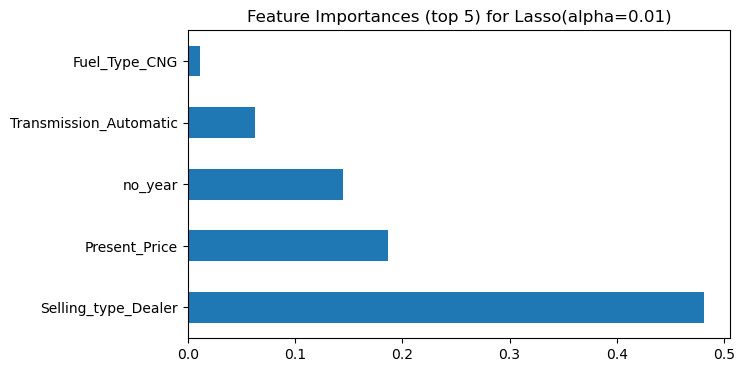

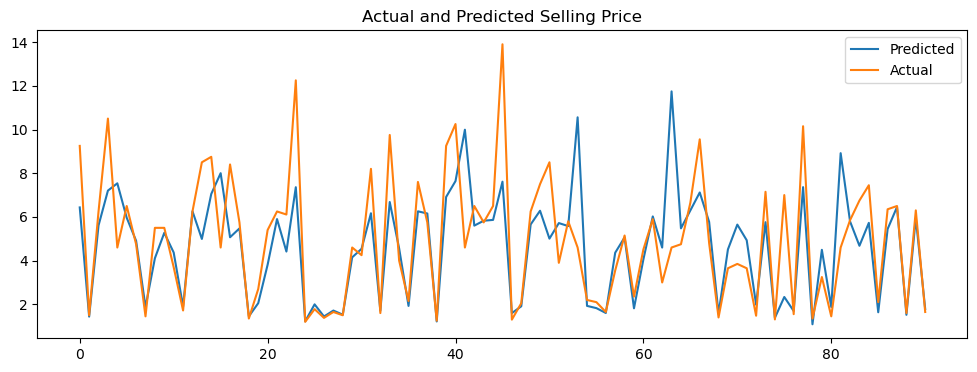

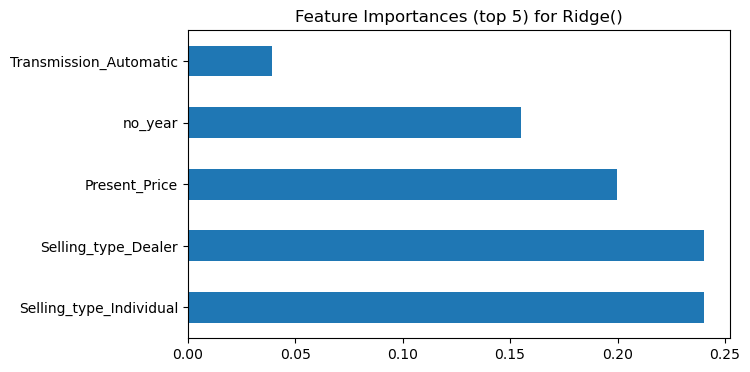

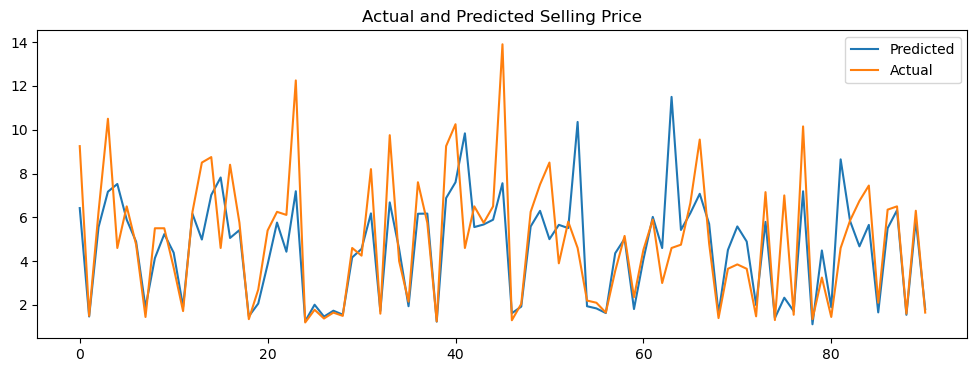

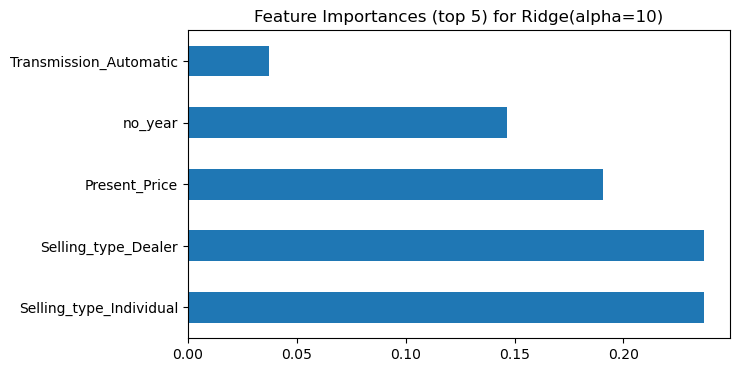

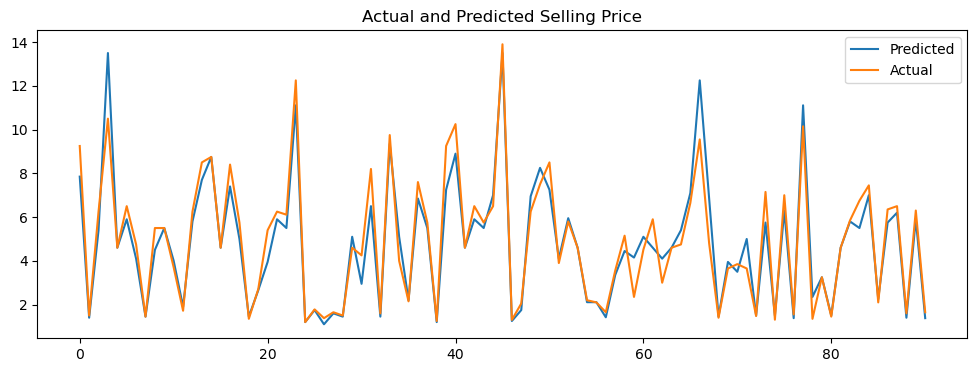

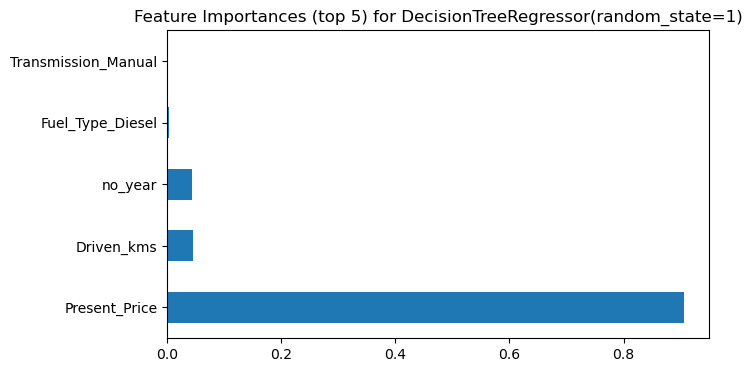

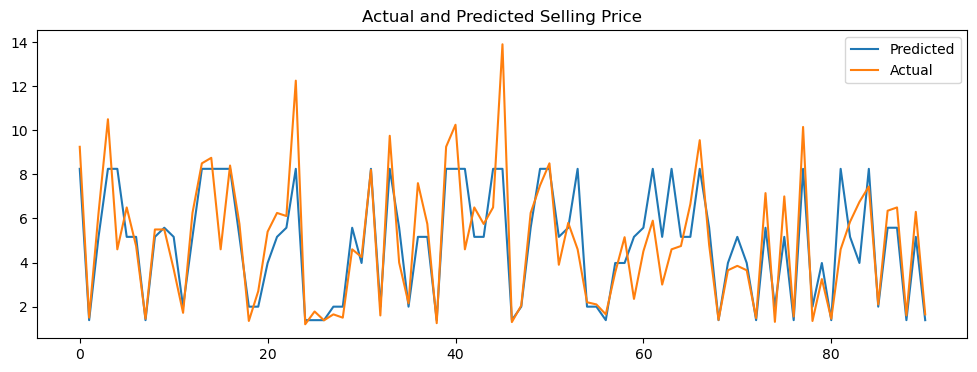

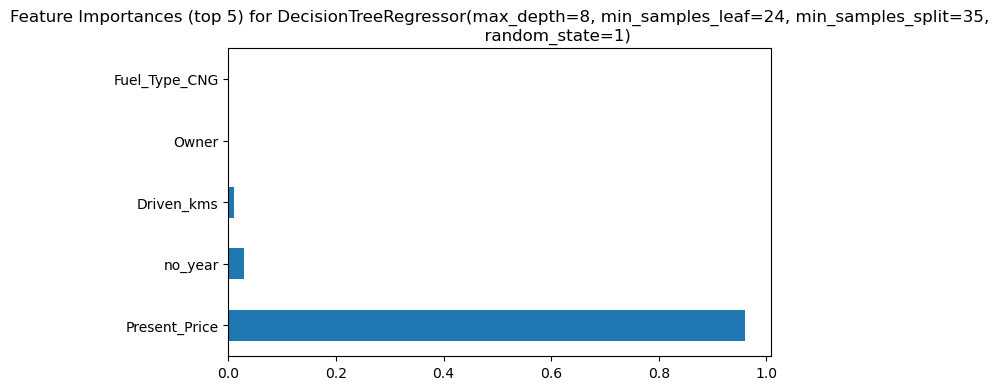

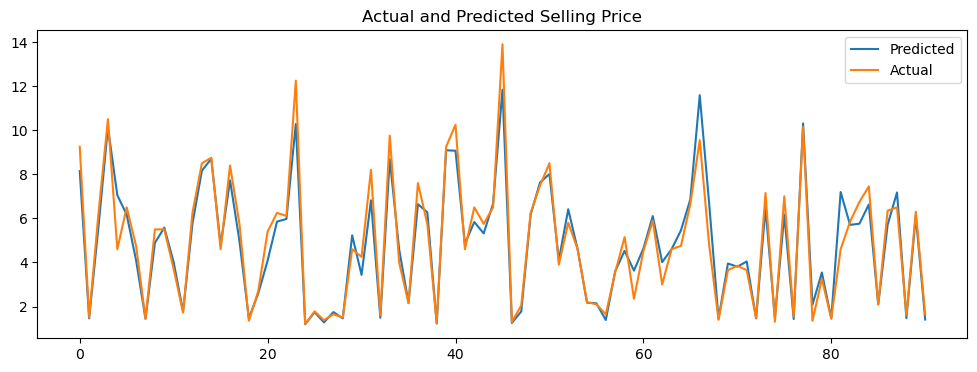

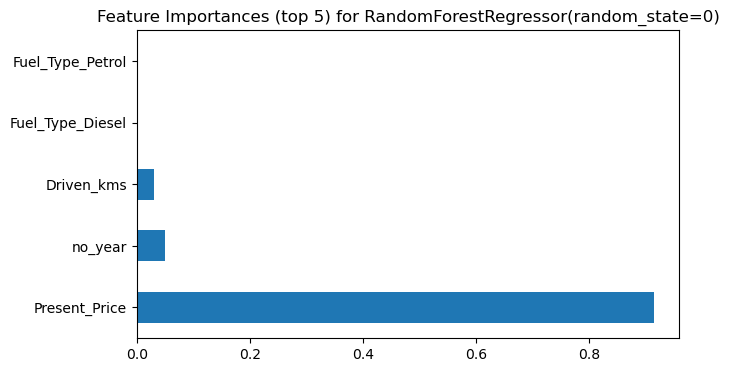

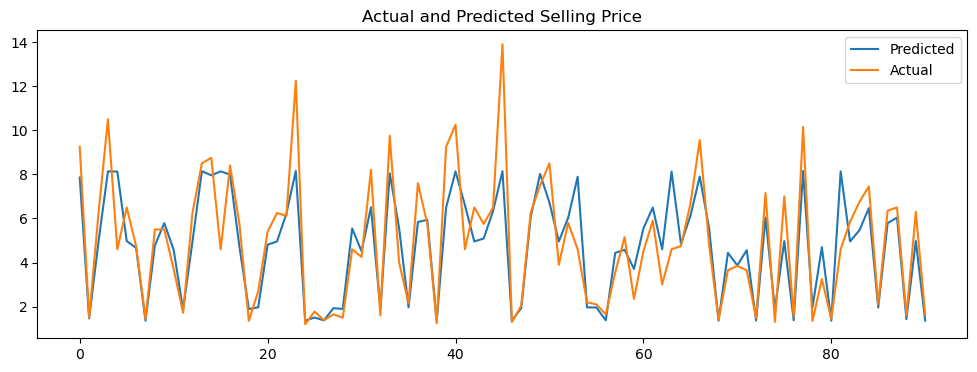

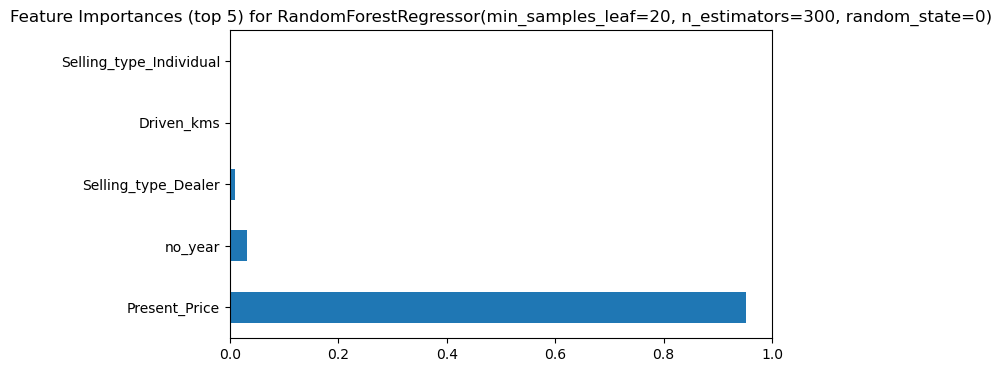

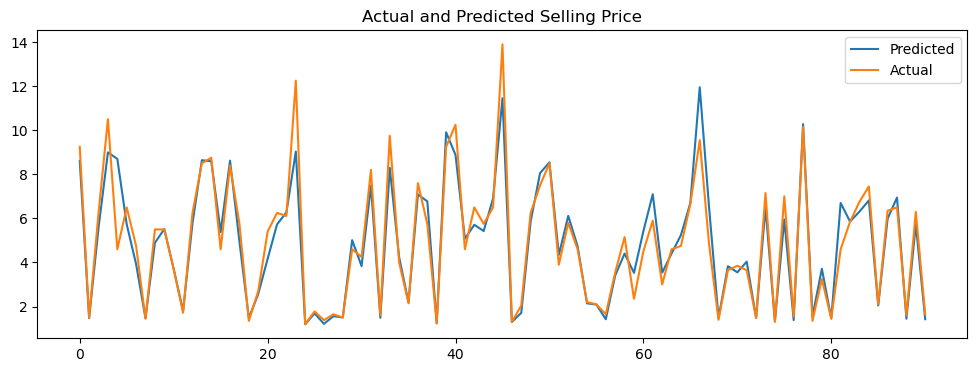

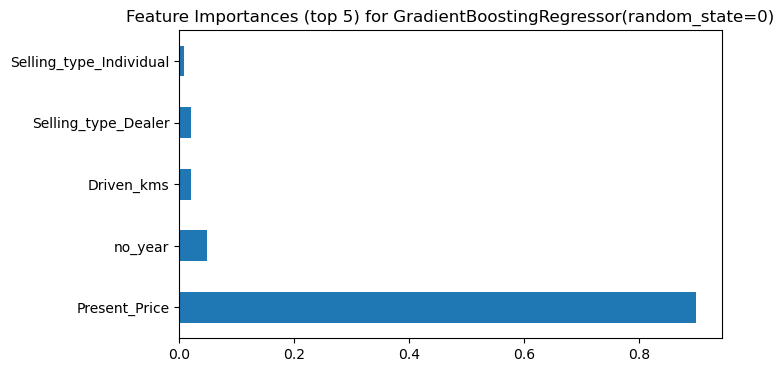

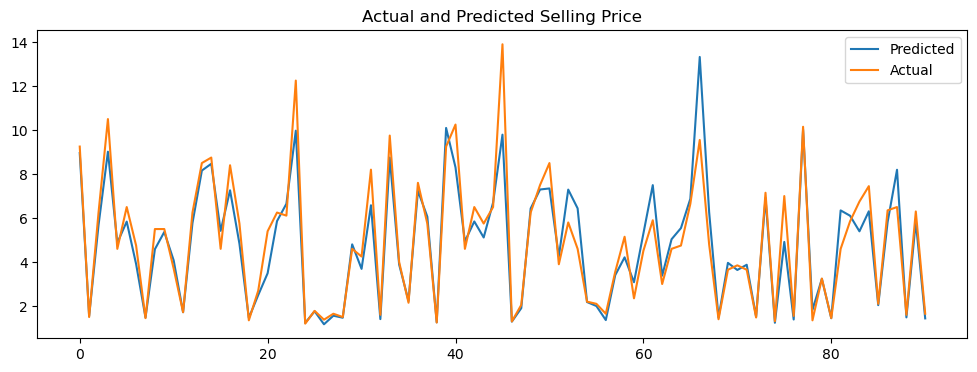

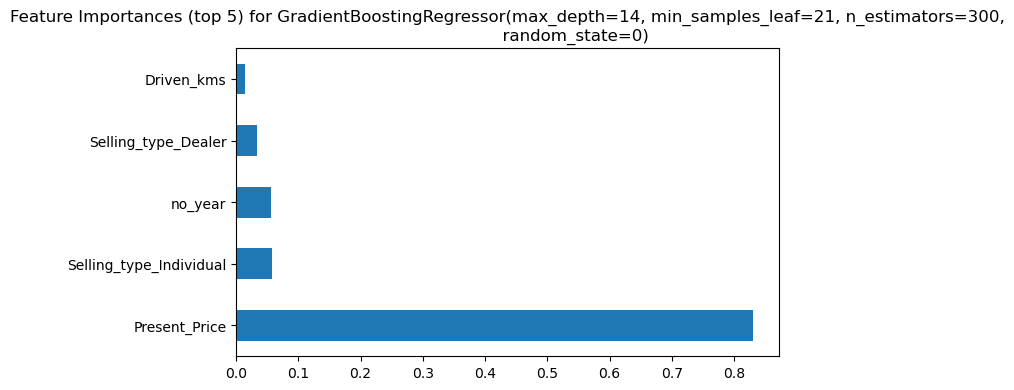

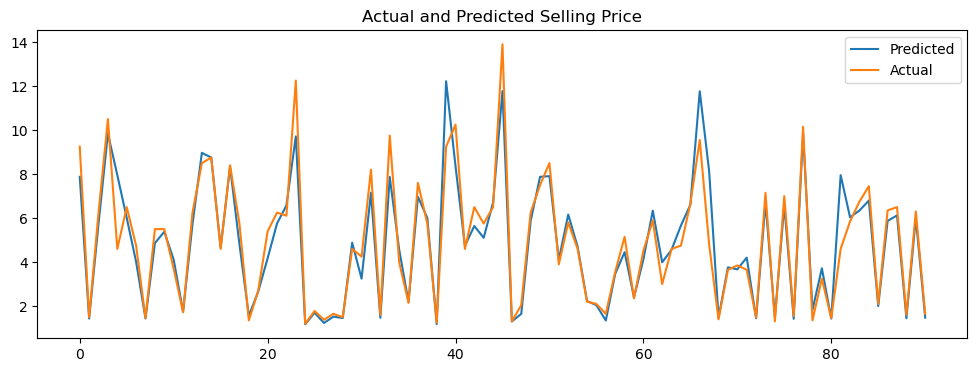

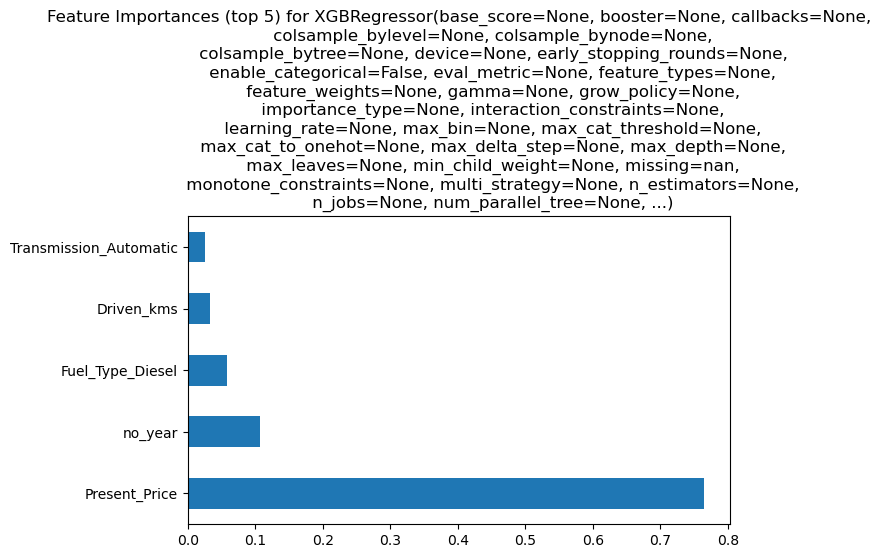

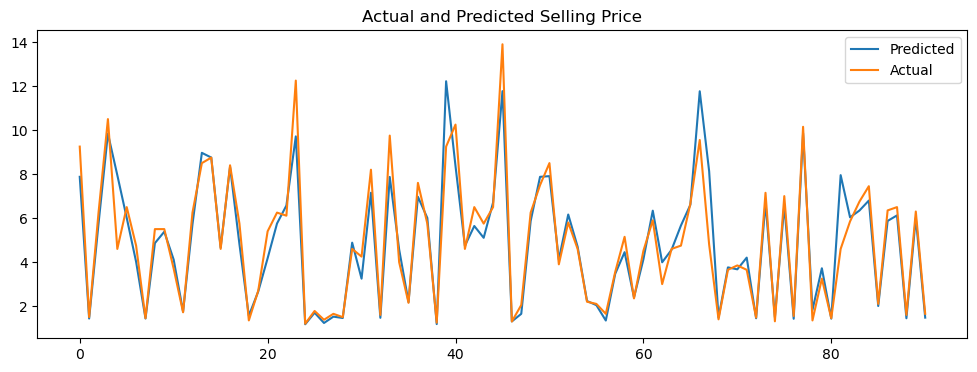

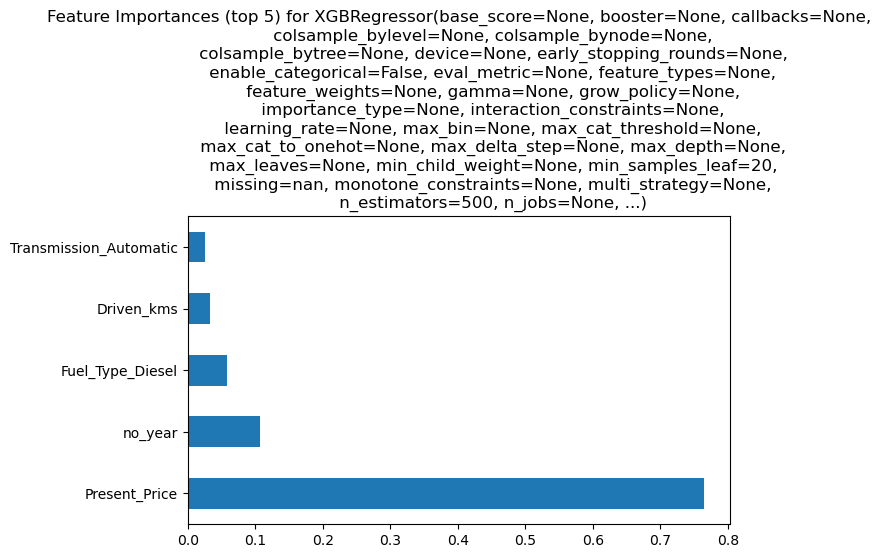

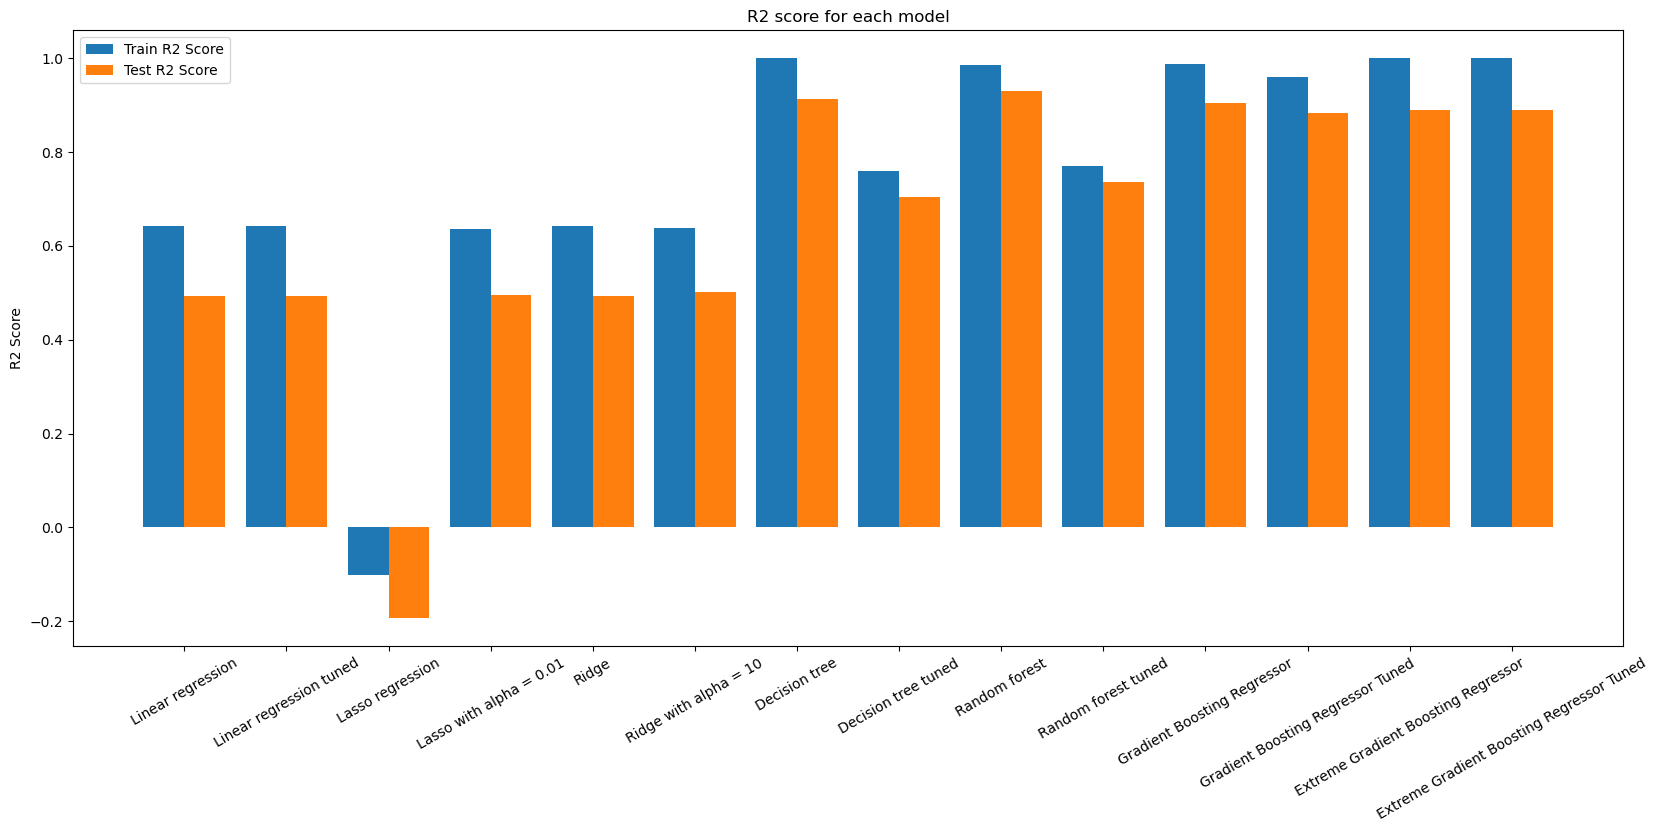

In [303]:

models = list(score.columns)
train = score.iloc[-3,:]
test = score.iloc[-2,:]

X_axis = np.arange(len(models))

plt.figure(figsize=(20,8))
plt.bar(X_axis - 0.2, train, 0.4, label = 'Train R2 Score')
plt.bar(X_axis + 0.2, test, 0.4, label = 'Test R2 Score')


plt.xticks(X_axis,models, rotation=30)
plt.ylabel("R2 Score")
plt.title("R2 score for each model")
plt.legend()
plt.show()

### 1. Which Evaluation metrics did i consider for a positive business impact and why?

On the basis of all the model i have decided to select R2 score Evaluation matrics which shows the accuracy of the model which is very good indicator to check the feasibility of the model.

### 2. Which ML model did i choose from the above created models as the final prediction model and why?

I have ran a several models like linear regression, decision tree, random forest, gradient boosting, and xtreame gradient boosting but amongst them i have selected random forest model as i achieved 98% training accuracy and 93% testing accuracy. Some models were overfitted so i did not consider them.

# **Conclusion**

This project explores the automotive industry's intricate dynamics, aiming to predict car prices with machine learning. By analyzing various factors such as fuel type, seller type, and transmission, we uncover valuable insights and select a robust model for accurate price prediction.

**Key Insights:**

- The 'city' model is the top-selling car, followed by 'corolla altis,' 'verna,' 'fortuner,' and 'brio,' providing a snapshot of popular car models in the market.

- The year 2015 saw the highest number of car purchases, making it the most favored year for buying cars, followed by 2016 and 2014.

- 'Petrol' is the predominant fuel type for cars in the dataset, surpassing 'Diesel' and 'CNG,' indicating fuel preference among buyers.

- The majority of cars are sold through dealers, underscoring the role of dealerships in the automotive market.

- 'Manual' transmission cars significantly outnumber 'Automatic' transmission cars, showcasing consumer transmission preferences.

- 'First Owner' cars generally command higher 'Selling_Price,' while 'Second' or 'Third Owner' cars often have lower prices.

- 'Diesel' cars tend to have higher 'Selling_Price' compared to 'Petrol' or 'CNG' vehicles, emphasizing the influence of fuel type on car pricing.

- 'Dealer' sellers usually ask for higher prices than 'Individual' sellers, revealing the impact of seller type on prices.

- 'Automatic' transmission cars typically have higher prices than their 'Manual' counterparts, reflecting consumer preferences.

- 'Owner' count plays a role in car pricing, with 'First Owner' cars being more expensive than 'Second' or 'Third Owner' cars.

- The relationship between driven kilometers and 'Selling_Price' is negative, suggesting that cars with fewer kilometers tend to have higher selling prices.

- Various machine learning models were assessed, with the Random Forest model being chosen for car price prediction due to its robust performance.

- The project used the R2 score as the primary evaluation metric to assess model accuracy.

- The Random Forest model achieved impressive accuracy with 98% training accuracy and 93% testing accuracy, making it a suitable choice for car price prediction.

The insights provide a holistic understanding of the factors influencing car prices, both from exploratory data analysis and machine learning model perspectives. The Random Forest model's accuracy underscores its potential for practical applications in the automotive market.

This project has not only equipped us with valuable data science skills but has also deepened our understanding of car pricing, making it a significant step in the field of data science and machine learning.